**IMPORT lIBRARY**

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**DATA** **PREPROCESSING** **& EDA**

In [90]:
# Load and preprocess data

file_path = r'/content/Data_Train_Stunt_Rev.csv'
data = pd.read_csv(file_path)

print(data.head())

print(data.info())

print(data.describe(include='all'))

   umur Jenis Kelamin  Berat Badan  Panjang Badan  Lingkar Kepala Keterangan
0     0     Laki Laki            2             50              30   stunting
1     0     Laki Laki            1             45              36   stunting
2     0     Laki Laki            4             41              32   stunting
3     0     Laki Laki            2             43              34   stunting
4     0     Laki Laki            2             47              30   stunting
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   umur            3600 non-null   int64 
 1   Jenis Kelamin   3600 non-null   object
 2   Berat Badan     3600 non-null   int64 
 3   Panjang Badan   3600 non-null   int64 
 4   Lingkar Kepala  3600 non-null   int64 
 5   Keterangan      3600 non-null   object
dtypes: int64(4), object(2)
memory usage: 168.9+ KB
None
               umur Jen

In [91]:
missing_values = data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
umur              0
Jenis Kelamin     0
Berat Badan       0
Panjang Badan     0
Lingkar Kepala    0
Keterangan        0
dtype: int64


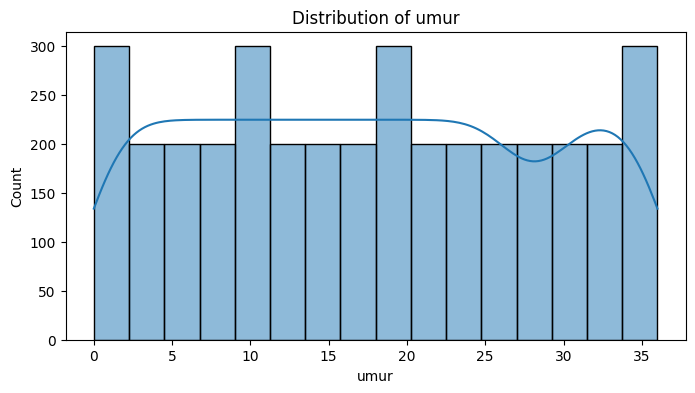

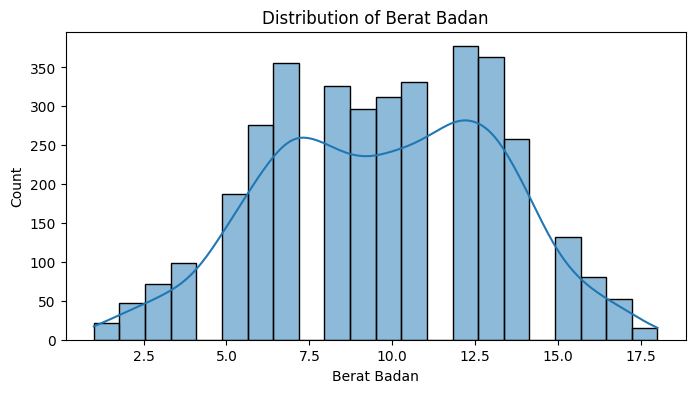

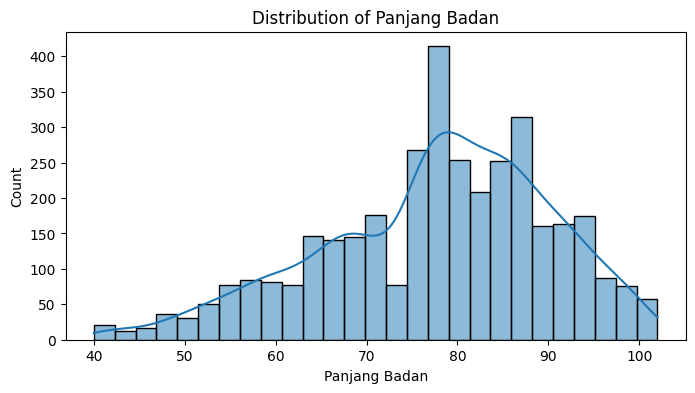

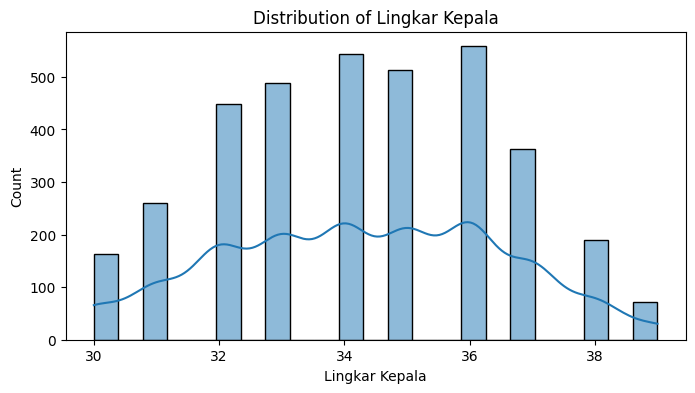

In [92]:
# Distribusi fitur numerik
numerical_features = ['umur', 'Berat Badan', 'Panjang Badan', 'Lingkar Kepala']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

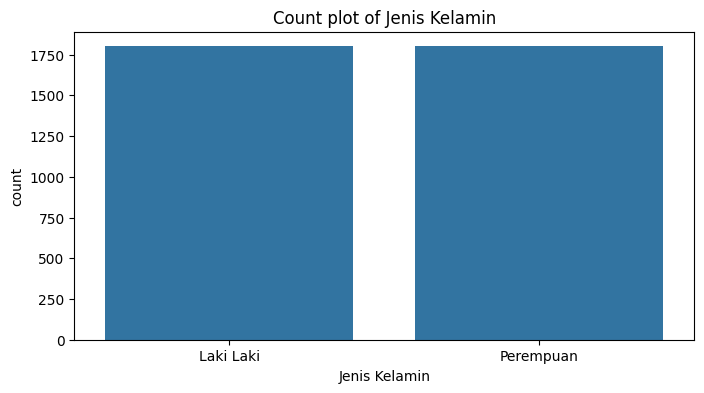

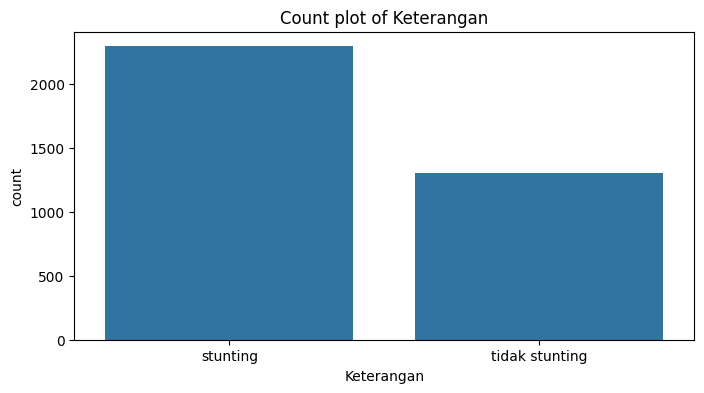

In [93]:
# Distribusi fitur kategori
categorical_features = ['Jenis Kelamin', 'Keterangan']
#categorical_features = ['kelamin', 'label']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[feature])
    plt.title(f'Count plot of {feature}')
    plt.show()

**CLEANING DATASET**

In [100]:
data.rename(columns={'Keterangan': 'Label'}, inplace=True)

data.rename(columns={'umur': 'Umur'}, inplace=True)

data = data.dropna()

random_data = data.sample(n=5)
print(random_data)

print(data.describe(include='all'))

      Umur  Jenis Kelamin  Berat Badan  Panjang Badan  Lingkar Kepala  Label
478      4              1            7             66              34      1
905      9              0            9             72              34      1
2209    22              0           14             77              33      0
1583    15              1           10             79              34      0
1791    17              1           13             83              32      0
              Umur  Jenis Kelamin  Berat Badan  Panjang Badan  Lingkar Kepala  \
count  3600.000000    3600.000000  3600.000000    3600.000000     3600.000000   
mean     17.718056       0.500000     9.756944      77.660000       34.279444   
std      10.688949       0.500069     3.512069      12.635087        2.223350   
min       0.000000       0.000000     1.000000      40.000000       30.000000   
25%       8.750000       0.000000     7.000000      69.000000       33.000000   
50%      17.500000       0.500000    10.000000      

In [101]:
label_encoder = LabelEncoder()
data['Jenis Kelamin'] = label_encoder.fit_transform(data['Jenis Kelamin'])
data['Label'] = label_encoder.fit_transform(data['Label'])

X = data[['Umur', 'Jenis Kelamin', 'Berat Badan', 'Panjang Badan', 'Lingkar Kepala']]
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODELLING STUNTING PREDICT

In [102]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=100  )

model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Save the final model
model.save('stunting.h5')

# Evaluate the final model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy}")

y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))


Epoch 1/1000
72/72 [==============================] - 1s 5ms/step - loss: 0.5056 - accuracy: 0.7257 - val_loss: 0.4071 - val_accuracy: 0.8125
Epoch 2/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8338 - val_loss: 0.3235 - val_accuracy: 0.8854
Epoch 3/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.8741 - val_loss: 0.2824 - val_accuracy: 0.8976
Epoch 4/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2726 - accuracy: 0.8885 - val_loss: 0.2596 - val_accuracy: 0.8993
Epoch 5/1000
72/72 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9049 - val_loss: 0.2434 - val_accuracy: 0.8958
Epoch 6/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2269 - accuracy: 0.9145 - val_loss: 0.2252 - val_accuracy: 0.9097
Epoch 7/1000
72/72 [==============================] - 0s 3ms/step - loss: 0.2136 - accuracy: 0.9201 - val_loss: 0.2121 - val_accuracy: 0.9132
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9569
Test Accuracy: 0.956944465637207
23/23 [==============================] - 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       465
           1       0.94      0.94      0.94       255

    accuracy                           0.96       720
   macro avg       0.95      0.95      0.95       720
weighted avg       0.96      0.96      0.96       720

AUC-ROC Score: 0.9898545224541428


LOAD MODEL

In [107]:
from tensorflow.keras.models import load_model

# Load model
model_path = 'stunting.h5'
model = load_model(model_path)

# Misalkan data baru yang ingin diprediksi
new_data = pd.DataFrame({
    'Umur': [28, 36, 14, 5, 20, 2, 3, 2],
    'Jenis Kelamin': ['0', '1', '0', '1', '0', '0', '1', '0'],
    'Berat Badan': [11, 10, 8, 7, 9, 6, 8, 5],
    'Panjang Badan': [83, 88, 70, 62, 76, 55, 64, 60],
    'Lingkar Kepala': [36, 36, 34, 33, 34, 34, 35, 33]
})

# Preprocess new data
label_encoder = LabelEncoder()
label_encoder.fit(data['Jenis Kelamin'])
new_data['Jenis Kelamin'] = label_encoder.fit_transform(new_data['Jenis Kelamin'])

# Define features
X_new = new_data[['Umur', 'Jenis Kelamin', 'Berat Badan', 'Panjang Badan', 'Lingkar Kepala']]

# Scale features
scaler = StandardScaler()
scaler.fit(X)
X_new_scaled = scaler.fit_transform(X_new)

# Predict using the model
y_pred_new = model.predict(X_new_scaled)
y_pred_new_binary = (y_pred_new > 0.5).astype(int)

# Print prediction results
print("Predictions (0: Tidak Stunting, 1: Stunting):")
print(y_pred_new_binary)

1/1 [==============================] - 0s 62ms/step
Predictions (0: Tidak Stunting, 1: Stunting):
[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]]


In [109]:
# Convert the model to TensorFlow.js format
!pip install tensorflowjs
#!tensorflowjs_converter --input_format keras stunting.h5 tfjs.model
!tensorflowjs_converter --input_format=keras stunting.h5 tfjs.stunting

  Using cached tensorflowjs-4.20.0-py3-none-any.whl (89 kB)
  Using cached tensorflow_decision_forests-1.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.5 MB)
  Using cached packaging-23.2-py3-none-any.whl (53 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Success

2024-06-19 18:25:45.056653: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
